In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import read_log

In [2]:
def clean_list(lis):
    return [el for el in lis if el != '']

In [3]:
def update_volatility(prices):
    lambda_=0.94
    vol_floor=0.5
    if len(prices) < 2:
        return vol_floor
    log_returns = np.diff(np.log(prices))
    squared_returns = log_returns**2
    weights = (1 - lambda_) * lambda_**np.arange(len(squared_returns))[::-1]
    ewma_vol = np.sqrt(np.sum(weights * squared_returns))
    return max(ewma_vol, vol_floor)

In [4]:
def avellaneda_stoikov_reservation_price(price, position, volatility):
    gamma = 0.2  # risk aversion
    spread = 1

    reservation_price = price - position * gamma * volatility**2
    return reservation_price

# Backtest

In [17]:
sandbox, activities, trades = read_log('../backtests/2025-04-18_16-46-03.log')

Error parsing JSON: Expecting property name enclosed in double quotes: line 9 column 3 (char 155)


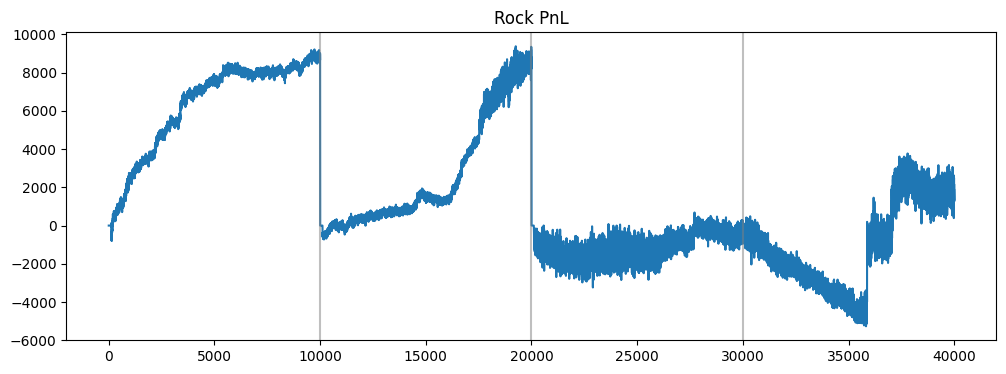

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'VOLCANIC_ROCK']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_9500']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_9750']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10250']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'VOLCANIC_ROCK_VOUCHER_10500']['profit_and_loss'].to_numpy())
for i in [10000, 20000, 30000]:
    plt.axvline(i, c='gray', alpha=0.5)
plt.title('Rock PnL')
plt.show()

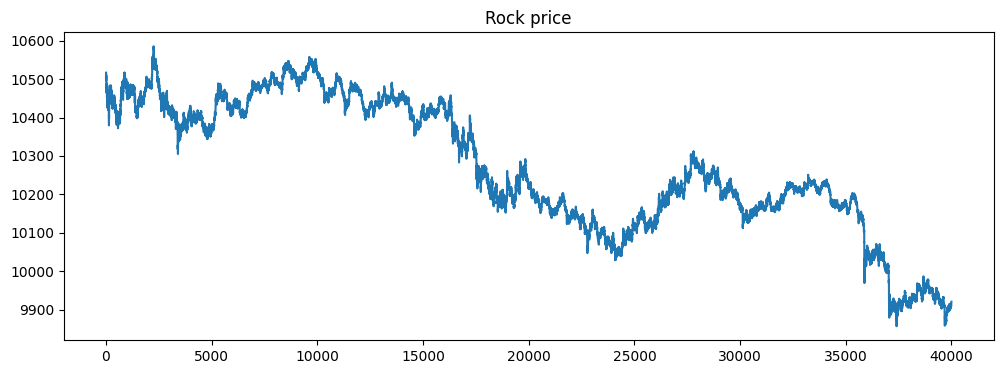

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'VOLCANIC_ROCK']['mid_price'].to_numpy())
plt.title('Rock price')
plt.show()

In [15]:
spr = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['mid_price'].to_numpy() -
        activities[activities['product'] == 'PICNIC_BASKET2']['mid_price'].to_numpy() -
        2 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'JAMS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['mid_price'].to_numpy())

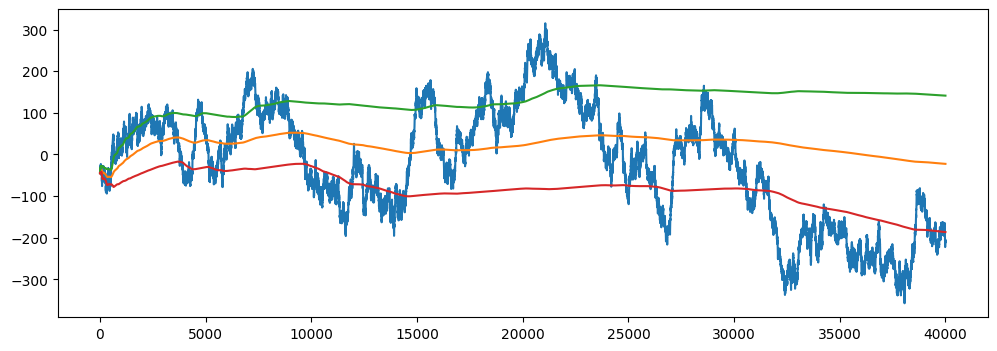

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(spr)
plt.plot(spr.expanding().mean())
plt.plot(spr.expanding().mean() + 1.2 * spr.expanding().std())
plt.plot(spr.expanding().mean() - 1.2 * spr.expanding().std())
plt.show()

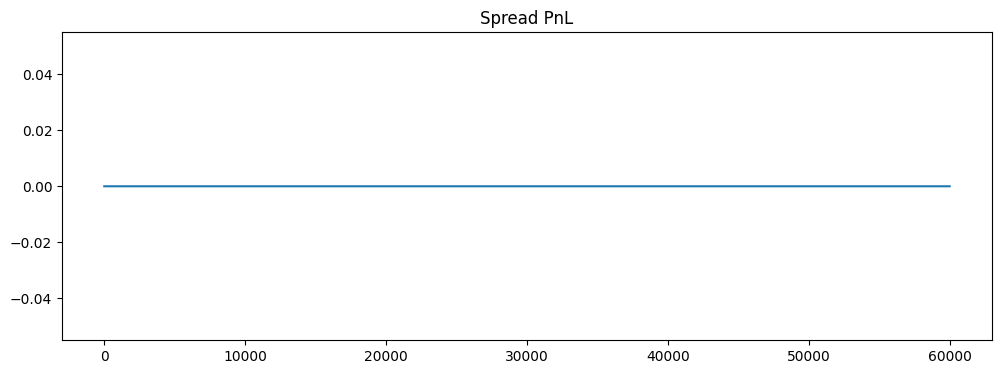

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'CROISSANTS']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'JAMS']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'DJEMBES']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'PICNIC_BASKET1']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'PICNIC_BASKET2']['profit_and_loss'].to_numpy())
plt.title('Spread PnL')
plt.show()

# Website

In [5]:
sandbox, activities, trades = read_log('../data/logs/round_3/0f773cca-e2fa-44e9-b203-943304332c22.log')

In [6]:
buys = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['buyer'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()
sells = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['seller'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()

C:\Users\aeali\AppData\Local\Temp\ipykernel_37076\1531186028.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  buys = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['buyer'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()
C:\Users\aeali\AppData\Local\Temp\ipykernel_37076\1531186028.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sells = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['seller'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()


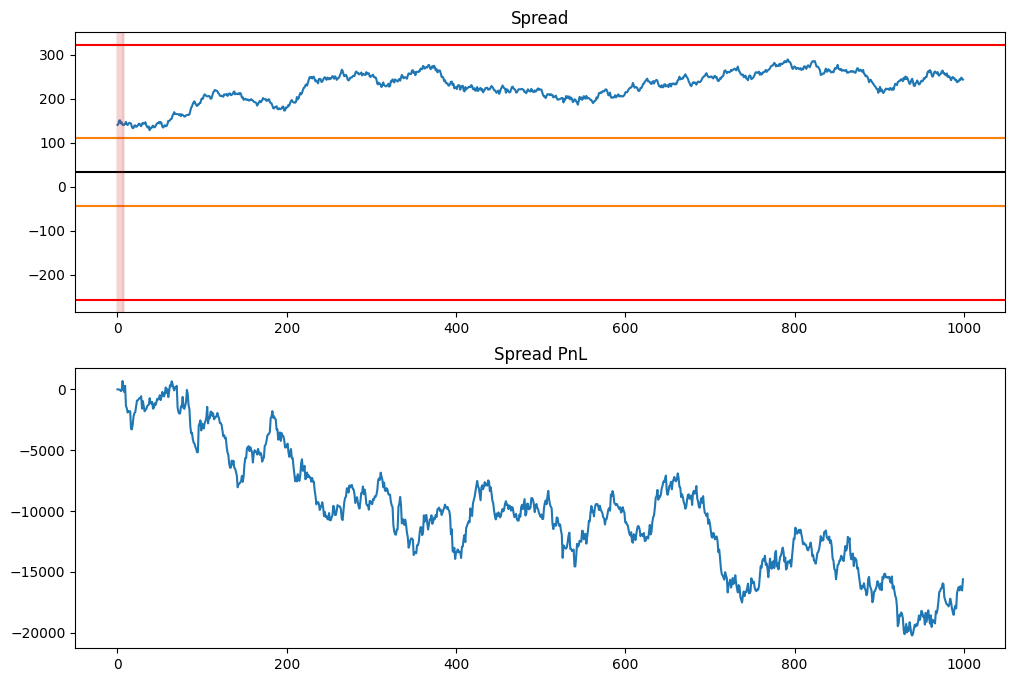

In [7]:
spr = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['mid_price'].to_numpy() -
        activities[activities['product'] == 'PICNIC_BASKET2']['mid_price'].to_numpy() -
        2 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'JAMS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['mid_price'].to_numpy())

spr_pnl = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['profit_and_loss'].to_numpy() -
        activities[activities['product'] == 'PICNIC_BASKET2']['profit_and_loss'].to_numpy() -
        2 * activities[activities['product'] == 'CROISSANTS']['profit_and_loss'].to_numpy() -
        activities[activities['product'] == 'JAMS']['profit_and_loss'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['profit_and_loss'].to_numpy())

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(spr)
ax[0].axhline(32.9, c='k')
ax[0].axhline(32.9 + 0.8 * 96.4, c='tab:orange')
ax[0].axhline(32.9 - 0.8 * 96.4, c='tab:orange')
ax[0].axhline(32.9 + 3 * 96.4, c='r')
ax[0].axhline(32.9 - 3 * 96.4, c='r')
for b in buys:
    ax[0].axvline(b, c='tab:green', alpha=0.1)
for s in sells:
    ax[0].axvline(s, c='tab:red', alpha=0.1)
ax[1].plot(spr_pnl)
ax[0].set_title('Spread')
ax[1].set_title('Spread PnL')
plt.show()

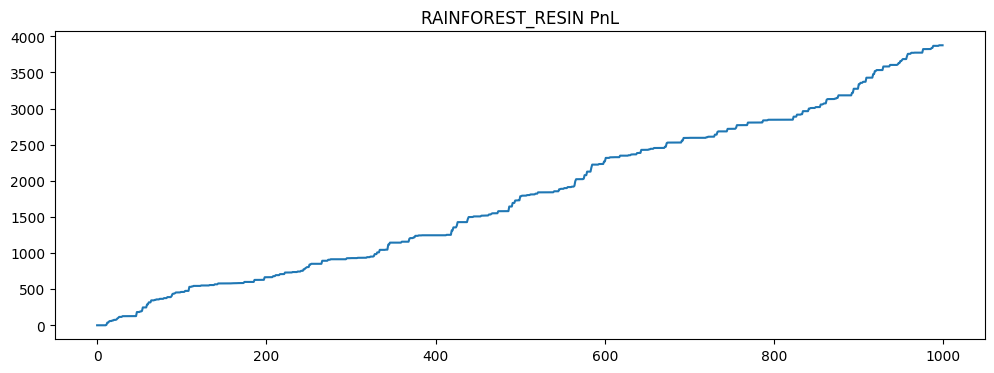

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'RAINFOREST_RESIN']['profit_and_loss'].to_numpy())
plt.title('RAINFOREST_RESIN PnL')
plt.show()

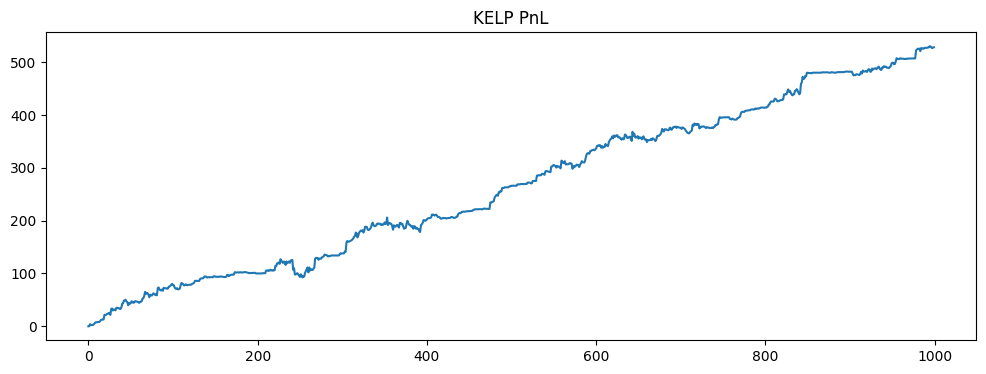

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'KELP']['profit_and_loss'].to_numpy())
plt.title('KELP PnL')
plt.show()

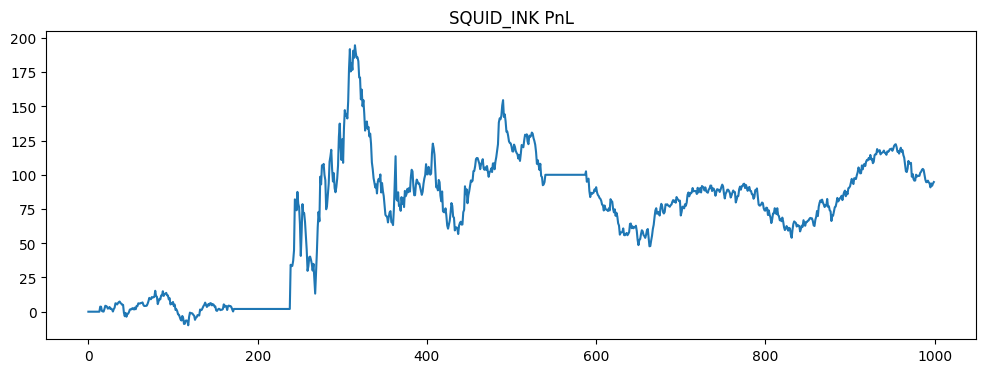

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'SQUID_INK']['profit_and_loss'].to_numpy())
plt.title('SQUID_INK PnL')
plt.show()

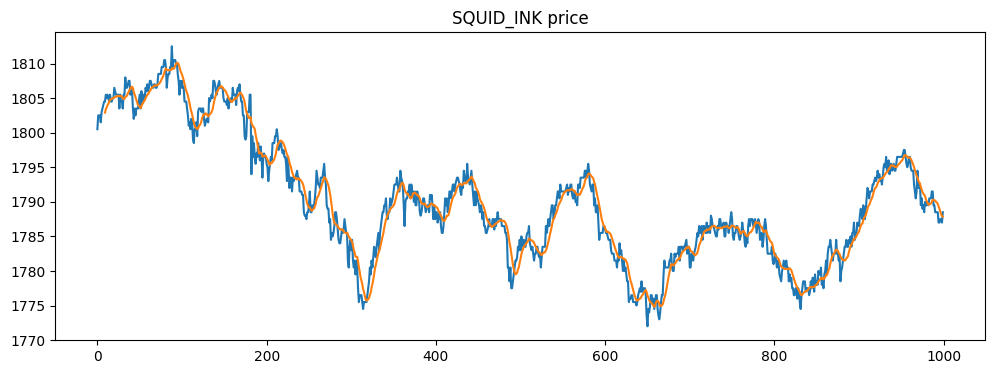

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'SQUID_INK']['mid_price'].to_numpy())
plt.plot(activities[activities['product'] == 'SQUID_INK']['mid_price'].rolling(10).mean().to_numpy())
plt.title('SQUID_INK price')
plt.show()

# Final

In [5]:
sandbox, activities, trades = read_log('../data/logs/round_2/351a5708-c942-4a38-995c-b5e139cc1bc7_final.log')

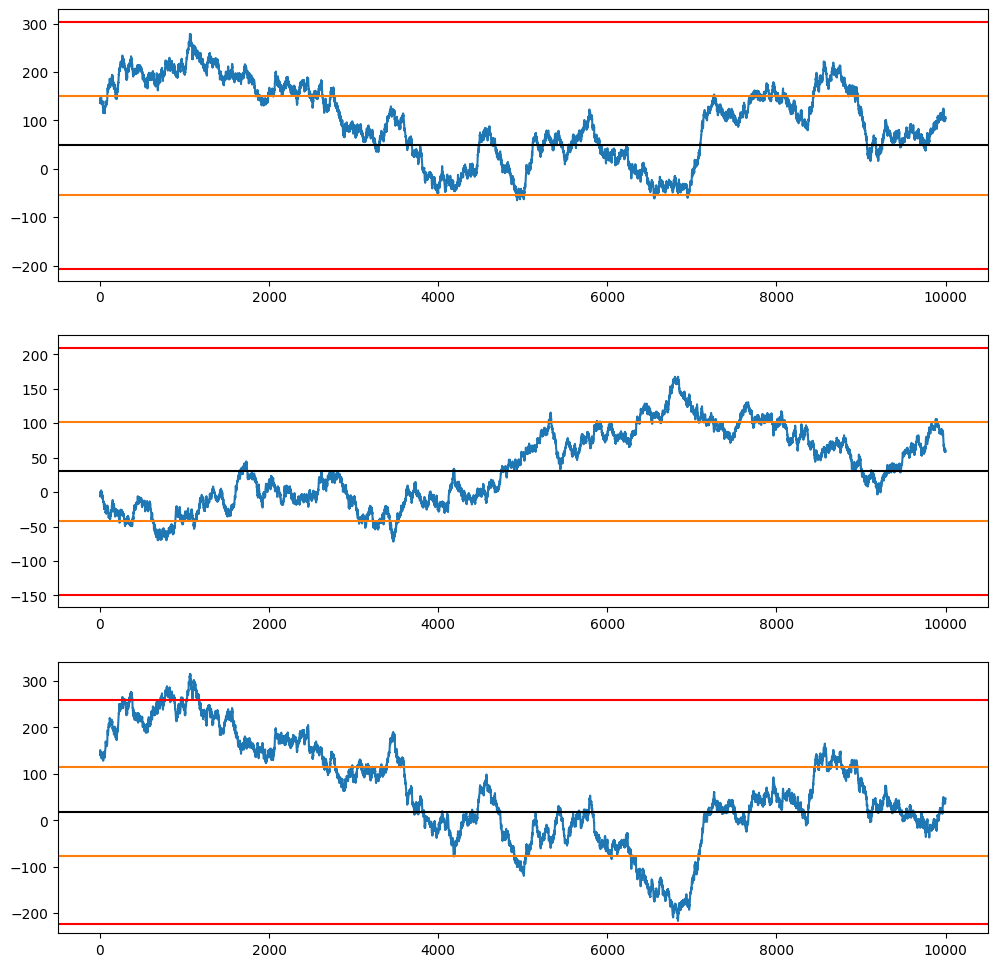

In [21]:
spr1 = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['mid_price'].to_numpy() -
        6 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
        3 * activities[activities['product'] == 'JAMS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['mid_price'].to_numpy())

spr2 = pd.Series(activities[activities['product'] == 'PICNIC_BASKET2']['mid_price'].to_numpy() -
        4 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
        2 * activities[activities['product'] == 'JAMS']['mid_price'].to_numpy())

spr3 = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['mid_price'].to_numpy() -
        activities[activities['product'] == 'PICNIC_BASKET2']['mid_price'].to_numpy() -
        2 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'JAMS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['mid_price'].to_numpy())

means = [48.8, 30.2, 18.5]
stds = [85.1, 59.8, 80.3]

fig, ax = plt.subplots(3, 1, figsize=(12, 12))
for i, spr in enumerate([spr1, spr2, spr3]):
    # ax[i].plot(spr)
    # ax[i].plot(spr.rolling(1000).mean())
    # ax[i].plot(spr.rolling(1000).mean() + 1.2 * spr.rolling(1000).std())
    # ax[i].plot(spr.rolling(1000).mean() - 1.2 * spr.rolling(1000).std())
    ax[i].plot(spr)
    ax[i].axhline(means[i], c='k')
    ax[i].axhline(means[i] + 1.2 * stds[i], c='tab:orange')
    ax[i].axhline(means[i] - 1.2 * stds[i], c='tab:orange')
    ax[i].axhline(means[i] + 3 * stds[i], c='r')
    ax[i].axhline(means[i] - 3 * stds[i], c='r')
plt.show()

In [ ]:
buys = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['buyer'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()
sells = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['seller'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()

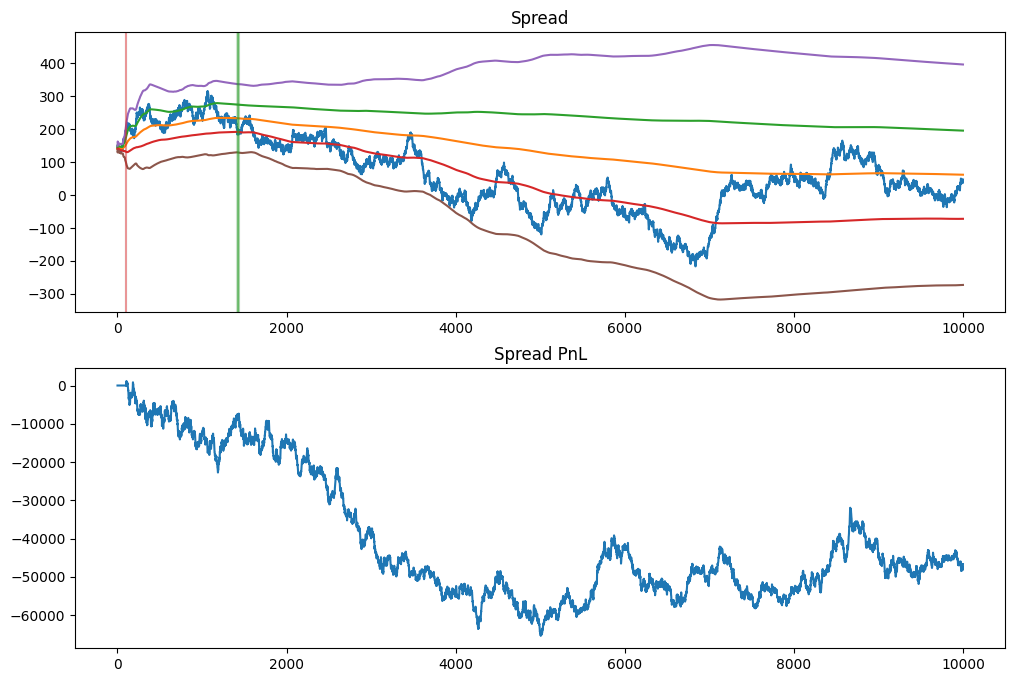

In [12]:
# spr = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['mid_price'].to_numpy() -
#         activities[activities['product'] == 'PICNIC_BASKET2']['mid_price'].to_numpy() -
#         2 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
#         activities[activities['product'] == 'JAMS']['mid_price'].to_numpy() -
#         activities[activities['product'] == 'DJEMBES']['mid_price'].to_numpy())

# spr_pnl = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['profit_and_loss'].to_numpy() -
#         activities[activities['product'] == 'PICNIC_BASKET2']['profit_and_loss'].to_numpy() -
#         2 * activities[activities['product'] == 'CROISSANTS']['profit_and_loss'].to_numpy() -
#         activities[activities['product'] == 'JAMS']['profit_and_loss'].to_numpy() -
#         activities[activities['product'] == 'DJEMBES']['profit_and_loss'].to_numpy())

spr = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['mid_price'].to_numpy() -
        activities[activities['product'] == 'PICNIC_BASKET2']['mid_price'].to_numpy() -
        2 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'JAMS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['mid_price'].to_numpy())

spr_pnl = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['profit_and_loss'].to_numpy() -
        activities[activities['product'] == 'PICNIC_BASKET2']['profit_and_loss'].to_numpy() -
        2 * activities[activities['product'] == 'CROISSANTS']['profit_and_loss'].to_numpy() -
        activities[activities['product'] == 'JAMS']['profit_and_loss'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['profit_and_loss'].to_numpy())

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(spr)
ax[0].plot(spr.expanding().mean())
ax[0].plot(spr.expanding().mean() + 1.2 * spr.expanding().std())
ax[0].plot(spr.expanding().mean() - 1.2 * spr.expanding().std())
ax[0].plot(spr.expanding().mean() + 3 * spr.expanding().std())
ax[0].plot(spr.expanding().mean() - 3 * spr.expanding().std())
for b in buys:
    ax[0].axvline(b, c='tab:green', alpha=0.1)
for s in sells:
    ax[0].axvline(s, c='tab:red', alpha=0.1)
ax[1].plot(spr_pnl)
ax[0].set_title('Spread')
ax[1].set_title('Spread PnL')
plt.show()

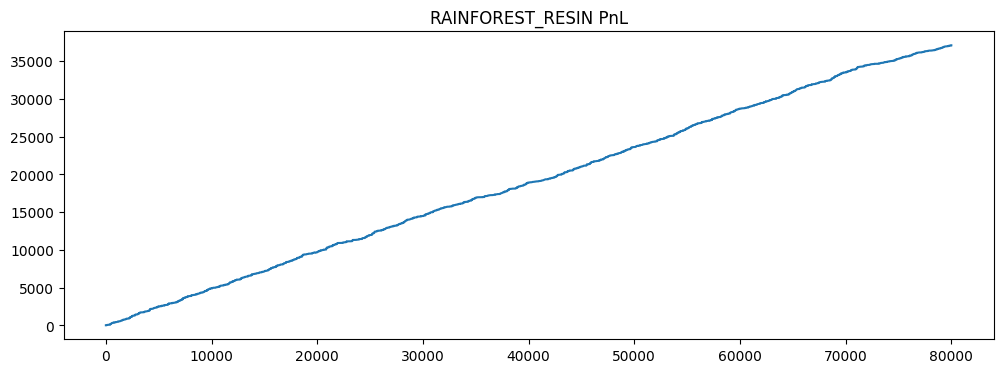

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'RAINFOREST_RESIN']['profit_and_loss'])
plt.title('RAINFOREST_RESIN PnL')
plt.show()

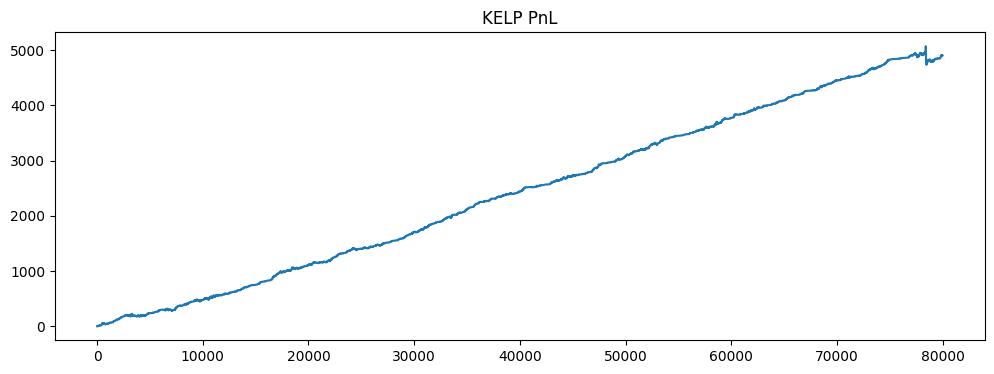

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'KELP']['profit_and_loss'])
plt.title('KELP PnL')
plt.show()

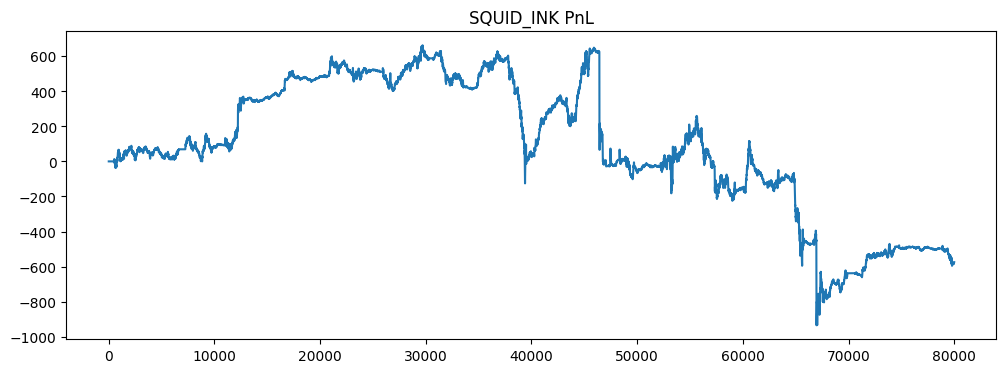

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'SQUID_INK']['profit_and_loss'])
plt.title('SQUID_INK PnL')
plt.show()